In [598]:
#import pandas and two datasets
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Let's checkout the train set

In [599]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [600]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [601]:
train.shape

(891, 12)

In [602]:
train.isnull().sum()
#missing data in Age,Cabin,Embarked column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [603]:
#check test dataset
test.info()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Let's visualization the dataset with matplotlib and seaborn

In [604]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [605]:
import pandas as pd
import matplotlib.pyplot as plt

def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    
    # Transpose the DataFrame for better plotting
    df = df.transpose()

    # Plotting the bar chart
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    
    # Adding labels and title
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Survival Analysis by {feature}')
    
    # Show the plot
    plt.show()



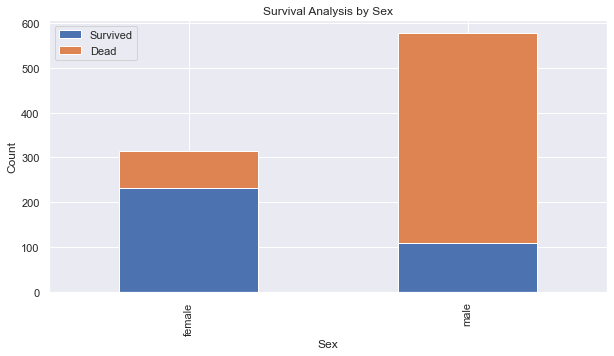

In [606]:
bar_chart('Sex')

In [607]:
train['Sex'].value_counts().get('male', 0)

577

In [608]:
train['Sex'].value_counts().get('female', 0)

314

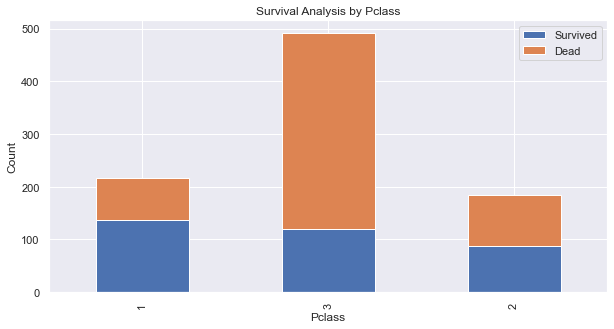

In [609]:
bar_chart('Pclass')

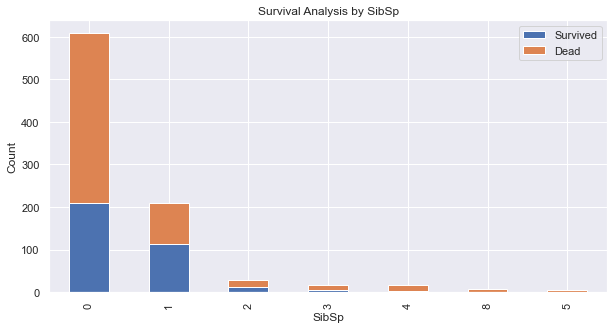

In [610]:
bar_chart('SibSp')

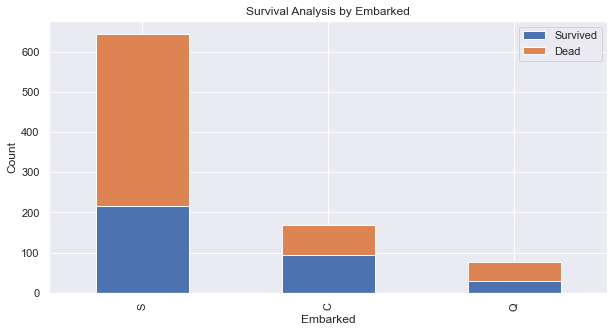

In [611]:
bar_chart('Embarked')

## Extracting Titles from Names

In [612]:
train_test_data = [train, test]

for dataset in train_test_data:
    # Extract titles using a regular expression
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Display unique titles to check the extraction
    print(dataset['Title'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [613]:
 print(dataset['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [614]:
train['Title'].value_counts()



Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [615]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [616]:
# Mapping titles to numerical values
title_mapping = {
    'Mr': 0,
    'Mrs': 2,
    'Miss': 1,
    'Master': 3,
    'Don': 3,
    'Rev': 3,
    'Dr': 3,
    'Mme': 3,
    'Ms': 3,
    'Major': 3,
    'Lady': 3,
    'Sir': 3,
    'Mlle': 3,
    'Col': 3,
    'Capt': 3,
    'Countess': 3,
    'Jonkheer': 3,
    'Dona': 3
}

# Apply the mapping to both 'train' and 'test' DataFrames
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

    # For titles not present in the mapping, assign 3
    dataset['Title'] = dataset['Title'].fillna(3)



In [617]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [618]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


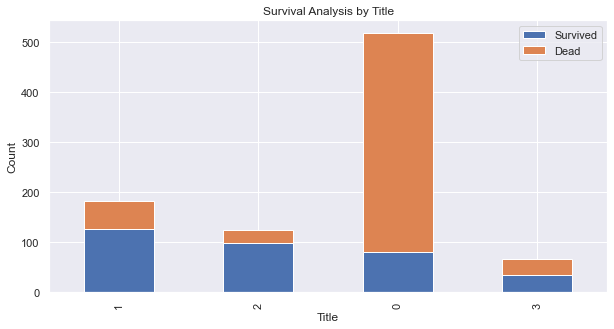

In [619]:
bar_chart('Title')

In [620]:
#We got the title of name . Now we don't need the Name column
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [621]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Mapping 'male' to 0 and 'female' to 1 in the 'Sex' Column

In [622]:
# Mapping 'male' to 0 and 'female' to 1
sex_mapping = {'male': 0, 'female': 1}

# Apply the mapping to both 'train' and 'test' DataFrames
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)



In [623]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


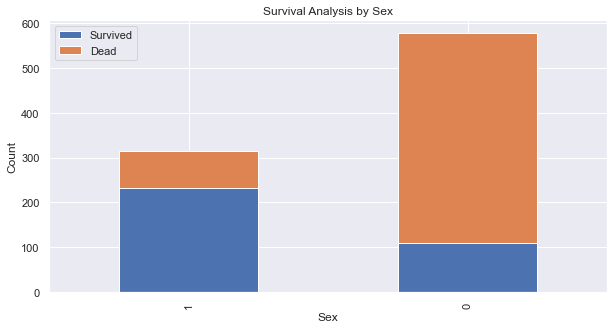

In [624]:
bar_chart('Sex')

## Let's work with age column

In [625]:
#fill missing age with median age for each title (Mr, Mrs, Miss, Others) Others) 

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True) 
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


In [626]:
train.groupby("Title")["Age"].transform("median")
train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,887,0,2,0,27.0,0,0,211536,13.00,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.00,B42,S,1
888,889,0,3,1,21.0,1,2,W./C. 6607,23.45,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3,0,32.0,0,0,370376,7.75,NaN,Q,0


In [627]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

## Seaborn

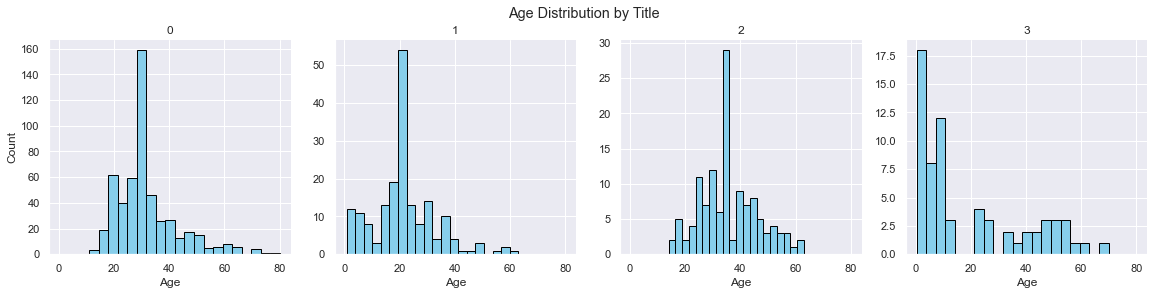

In [628]:
# Create a FacetGrid using Seaborn
g = sns.FacetGrid(train, col='Title', col_wrap=4, height=4, sharey=False)

# Map a histogram for 'Age' in each facet
g.map(plt.hist, 'Age', bins=20, color='skyblue', edgecolor='black')

# Add labels and title
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template='{col_name}')
plt.suptitle('Age Distribution by Title', y=1.02)

# Show the plot
plt.show()


## KDE Plot of Age Distribution by Survival Status

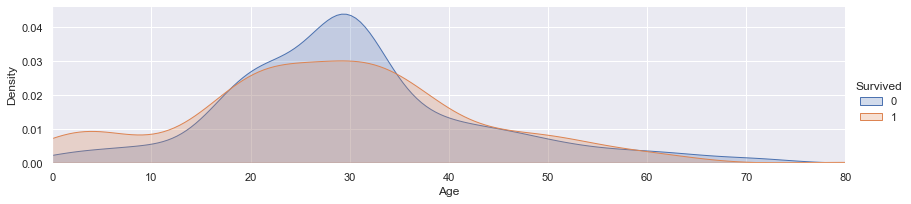

In [629]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

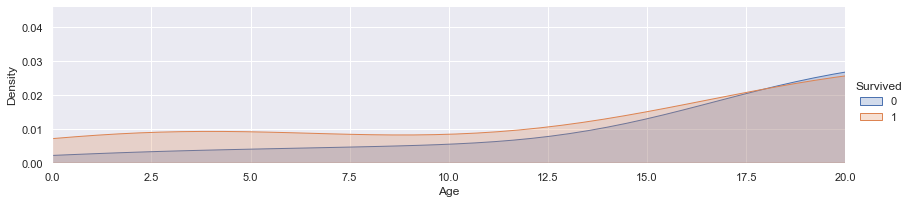

In [630]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20.0, 40.0)

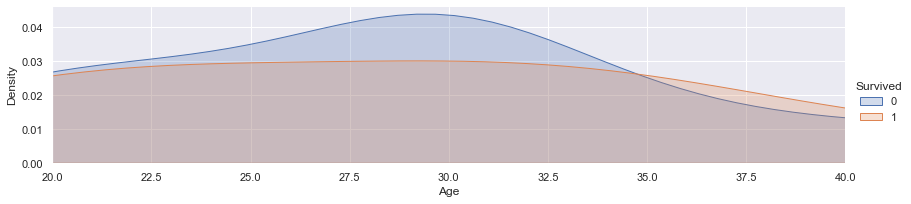

In [631]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(20,40)

(40.0, 60.0)

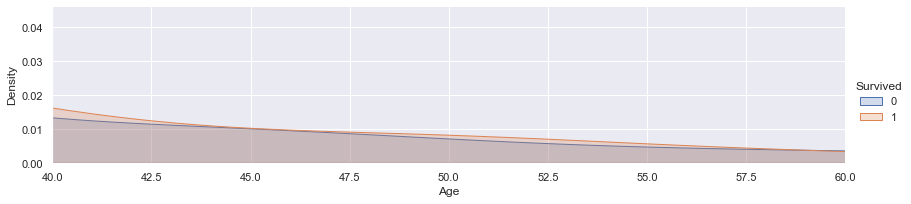

In [632]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.xlim(40,60)

In [633]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


## Grouping Ages into Categories

In [634]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4


In [635]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


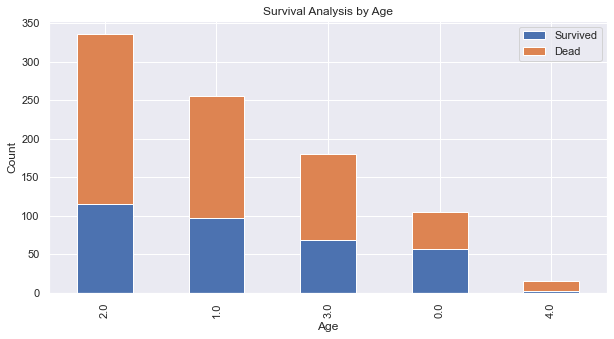

In [636]:
bar_chart('Age')

## Embarked Distribution by Passenger Class

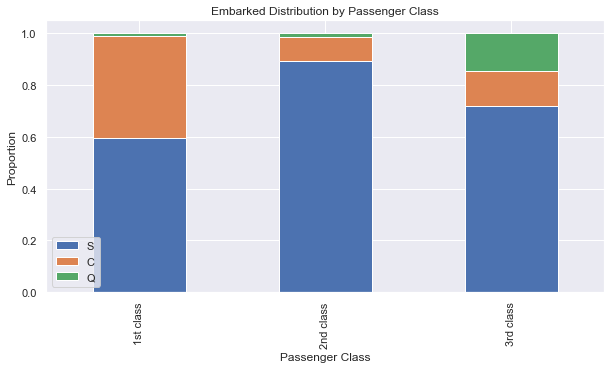

In [637]:
import pandas as pd
import matplotlib.pyplot as plt

Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts(normalize=True)
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts(normalize=True)
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts(normalize=True)

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Embarked Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion')
plt.show()


In [638]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [639]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [640]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

## Mapping Embarked Values to Numerical Representation

In [641]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


In [642]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [643]:
# Calculate median fare for each passenger class
median_fare_by_pclass = train.groupby('Pclass')['Fare'].median()

# Function to fill missing fare values with median fare based on passenger class
def fill_missing_fare(row):
    if pd.isnull(row['Fare']):
        return median_fare_by_pclass[row['Pclass']]
    else:
        return row['Fare']

# Apply the fill_missing_fare function to both 'train' and 'test' DataFrames
for dataset in train_test_data:
    dataset['Fare'] = dataset.apply(fill_missing_fare, axis=1)


In [644]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [645]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

## KDE Plot of Fare Distribution by Survival Status


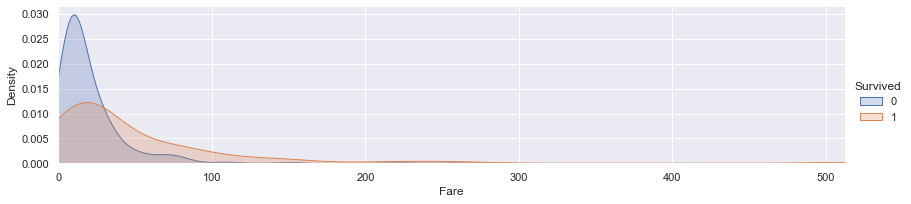

In [646]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

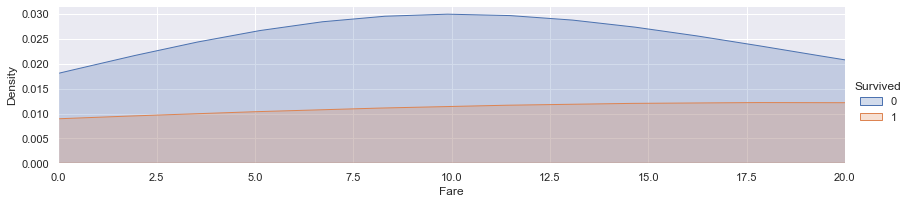

In [647]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
#0-20 limit
plt.xlim(0,20)

(0.0, 30.0)

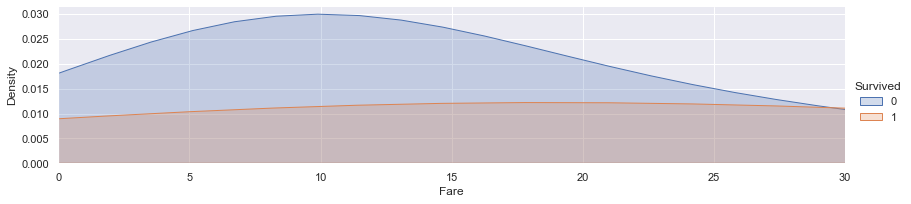

In [648]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
#0-20 limit
plt.xlim(0,30)

In [649]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3


In [650]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Now let's work with Cabin

In [651]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [652]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

<AxesSubplot:>

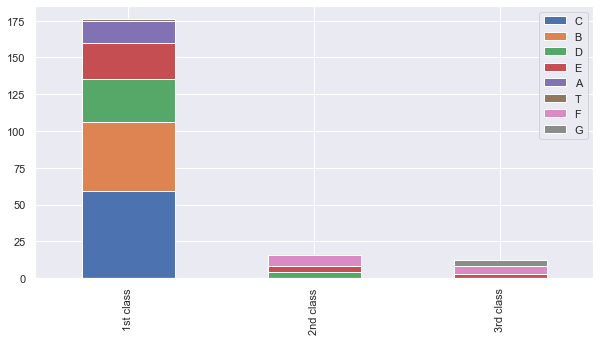

In [653]:
## Distribution of Cabins by Passenger Class
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()

df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))


In [654]:
cabing_mapping={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabing_mapping)

In [655]:
#filling missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform('median'),inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform('median'),inplace=True)


In [656]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


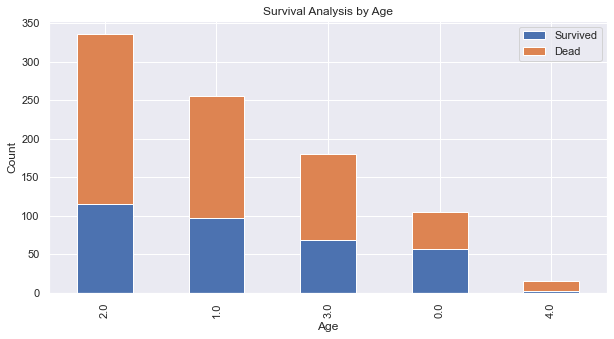

In [657]:
#let's see the age with bar_chart
bar_chart('Age')

## Family

In [658]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1
test["FamilySize"]=train["SibSp"]+train["Parch"]+1


(0.0, 11.0)

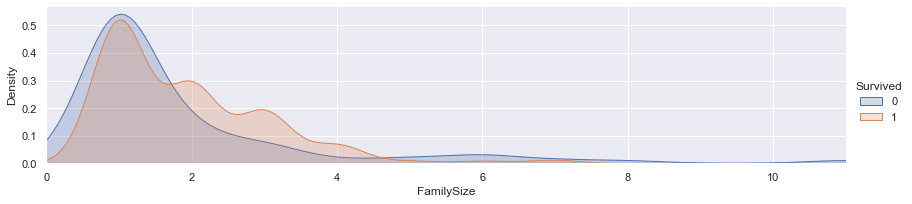

In [659]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [660]:
## Mapping Family Size to Numerical Representation
family_mapping={
    1:0,
    2:0.4,
    3:0.8,
    4:1.2,
    5:1.6,
    6:2,
    7:2.4,
    8:2.8,
    9:3.2,
    10:3.6,
    11:4
}
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [661]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# Remove unnecessary columns 'SibSp', 'Parch', 'Ticket' 

In [662]:

features_drop = ['SibSp', 'Parch','Ticket']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

# Drop 'PassengerId' column in the 'train' dataset
train = train.drop(['PassengerId'], axis=1)


In [663]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [664]:
train_data = train.drop(['Survived'], axis=1)
target = train['Survived']

print(train_data.shape, target.shape)


(891, 8) (891,)


## Let's see the all feature now

In [666]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


## MACHINE  LEARNING MODEL

In [668]:
#there is no missing data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [670]:
#Import Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [671]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)

## Decision Tree Classifier Cross-Validation

In [673]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.82022472 0.7752809  0.7752809  0.88764045 0.75280899
 0.83146067 0.82022472 0.74157303 0.79775281]


In [675]:
#decision tree score
round(np.mean(score)*100,2)

79.69

## Random Forest

In [676]:
clf=RandomForestClassifier()
scoring='accuracy'
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.82222222 0.82022472 0.80898876 0.76404494 0.87640449 0.80898876
 0.82022472 0.80898876 0.75280899 0.82022472]


In [677]:
#decision tree score
round(np.mean(score)*100,2)

81.03

# Create submission file

In [678]:
clf=RandomForestClassifier(n_estimators=13)
clf.fit(train_data,target)

test_data=test.drop("PassengerId",axis=1).copy()
prediction=clf.predict(test_data)

In [679]:
submission=pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":prediction
})

submission.to_csv('submission.csv',index=False)

In [680]:
# Now read the submission file using pandas
submission=pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
